In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert3/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert3/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert3/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert3/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert3/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert3/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert3/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert3/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert3/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,1
1,3
2,3
3,4
4,0
...,...
319,3
320,2
321,0
322,4


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,3.391219e-06,0.998779,0.000017,0.000542,0.000658,0.004997,0.542192,0.001640,0.412849,0.038322
1,2.239128e-03,0.001420,0.008331,0.987737,0.000273,0.107926,0.030859,0.025845,0.831134,0.004236
2,9.959946e-01,0.000086,0.000952,0.002861,0.000107,0.845171,0.003145,0.144672,0.001871,0.005141
3,2.714965e-04,0.003229,0.002937,0.993195,0.000367,0.005224,0.260100,0.007664,0.704964,0.022049
4,1.176167e-06,0.999442,0.000012,0.000273,0.000271,0.000596,0.913902,0.000294,0.073960,0.011248
5,5.061839e-04,0.001593,0.002268,0.995562,0.000071,0.000912,0.139050,0.001100,0.855016,0.003922
6,9.954605e-01,0.000098,0.000943,0.003377,0.000122,0.377361,0.010610,0.574804,0.031501,0.005725
7,1.200485e-06,0.999511,0.000010,0.000200,0.000278,0.006903,0.577216,0.005673,0.217297,0.192911
8,9.941346e-01,0.000127,0.000985,0.004616,0.000137,0.862238,0.006573,0.119150,0.010451,0.001588
9,8.026608e-04,0.001575,0.002745,0.994712,0.000166,0.000027,0.080173,0.002468,0.899748,0.017584


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000005,0.981468,0.000273,0.016926,0.001327,0.007531,0.691950,0.018730,0.141365,0.140424
1,0.001020,0.001276,0.004335,0.993254,0.000116,0.001424,0.059057,0.000296,0.932276,0.006947
2,0.001490,0.001257,0.005314,0.991808,0.000132,0.015010,0.135573,0.013196,0.823395,0.012826
3,0.000059,0.000358,0.001966,0.000031,0.997586,0.000333,0.018801,0.000235,0.004058,0.976572
4,0.995050,0.000111,0.001089,0.003594,0.000156,0.883457,0.000152,0.114867,0.001296,0.000228
...,...,...,...,...,...,...,...,...,...,...
319,0.002355,0.001351,0.008579,0.987449,0.000265,0.000253,0.072862,0.000361,0.924426,0.002098
320,0.000331,0.000038,0.996855,0.000672,0.002105,0.829375,0.006444,0.152231,0.007997,0.003953
321,0.994706,0.000124,0.001126,0.003871,0.000173,0.903415,0.001124,0.091981,0.002737,0.000744
322,0.000065,0.000349,0.001691,0.000030,0.997865,0.000091,0.030674,0.000014,0.005701,0.963520


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

# training machine learning

In [18]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='sigmoid')
svm=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [19]:
predictions

array([1, 3, 0, 3, 1, 3, 0, 1, 0, 3, 2, 3, 0, 0, 0, 4, 1, 1, 0, 4, 4, 4,
       0, 2, 0, 4, 0, 4, 2, 3, 2, 0, 1, 2, 1, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.83      1.00      0.91         5
           4       1.00      0.86      0.92         7

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


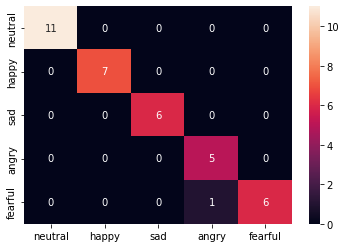

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [21]:
path='/content/drive/My Drive/fusion/savee_fusion_model/svm/sigmoid/expert3'
savedvX = joblib.dump(svm, path)

print("MODEL SAVED")

MODEL SAVED
